In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv("../Datasets/insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


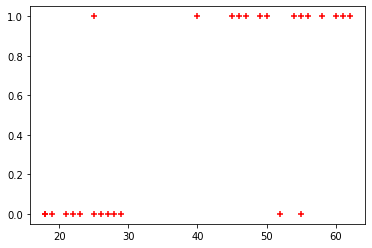

In [48]:
plt.scatter(df['age'],df['bought_insurance'],marker='+',color='red')

In [49]:
X_train,X_test,y_train,y_test = train_test_split(df[['age']],df['bought_insurance'],test_size=0.2,random_state=42)
print(X_test)

    age
8    62
13   29
9    61
21   26
0    22
11   28


In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

In [51]:
y_predicted = model.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_predicted,y_test)
print(score)

1.0


In [53]:
## Lets see mnanually

weight = model.coef_
bias = model.intercept_

print(weight,bias)

[[0.11307718]] [-4.15312723]


In [54]:
def sigmoid(x):
    return 1/(np.exp(-x))

def prediction(age):
    z = weight*age + bias
    k = sigmoid(z)
    return 1 if k>0.5 else 0

In [55]:
print(prediction(5))
prediction(35)

0


1

## Multiclass Logistic Regression

In [61]:
from sklearn.datasets import load_digits
digits = load_digits()

In [64]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

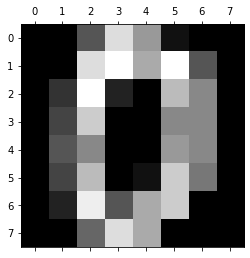

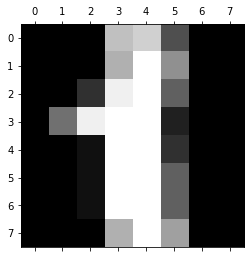

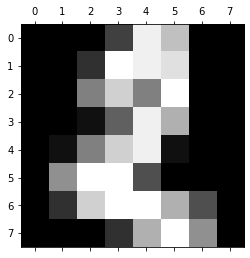

In [72]:
plt.gray()
for i in range(3):
    plt.matshow(digits.images[i])

In [65]:
digits.data[0]
## pixel representation

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [66]:
X_train,X_test, y_train,y_test = train_test_split(digits.data, digits.target,test_size=0.2,random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

D:\Anaconda\envs\gpu\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [67]:
## fitted model on the xtest and ytest data
model.score(X_test,y_test)

0.9694444444444444

In [71]:
X_test

array([[ 0.,  0.,  0., ..., 14.,  5.,  0.],
       [ 0.,  0., 11., ...,  1.,  0.,  0.],
       [ 0.,  0.,  8., ...,  8.,  0.,  0.],
       ...,
       [ 0.,  0.,  7., ..., 10.,  0.,  0.],
       [ 0.,  0.,  7., ..., 16.,  4.,  0.],
       [ 0.,  0., 14., ...,  5.,  0.,  0.]])

In [75]:
print(y_test[:5])  ## actual values

[6 9 3 7 2]


In [69]:
model.predict(X_test[:5]) ## predicted values

array([6, 9, 3, 7, 2])

## Confusion Matrix


In [76]:
y_predicted = model.predict(X_test)

In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 44,  0,  1,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 44,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 33,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 38]], dtype=int64)

Text(69.0, 0.5, 'Truth')

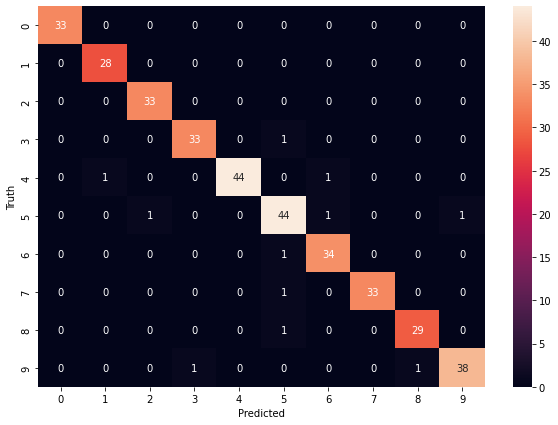

In [79]:
import seaborn as sns
plt.figure(figsize =(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
